In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/projects/timeseries')
!ls

Mounted at /content/gdrive
'Alpha and Beta.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 data
 data_plain
 sp500_close.csv
 ts_stck


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Explarotary Analysis of Stock data (time series) part 2

In [ ]:
close2 = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [ ]:
stc_symbol1='TSLA'
stc_symbol2='SPY'

In [ ]:
spy_return = close2[stc_symbol2].pct_change(1)
amd_return = close2[stc_symbol1].pct_change(1)

In [ ]:
joined = pd.concat([amd_return,spy_return],axis=1)

In [ ]:
joined.head()

,TSLA,SPY
2014-03-27,NaN,NaN
2014-03-28,0.024358,0.004930
2014-03-31,-0.018458,0.008195
2014-04-01,0.040873,0.006631
2014-04-02,0.061391,0.003347


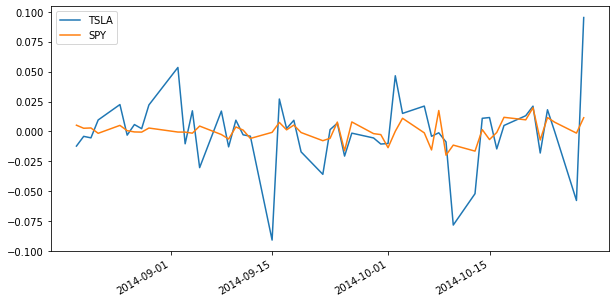

In [ ]:
joined.iloc[100:150].plot(figsize=(10, 5));

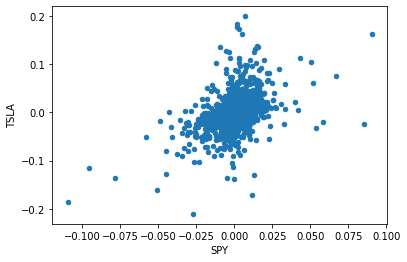

In [ ]:
joined.plot.scatter(stc_symbol2, stc_symbol1)

In [ ]:
# make the dataset
joined.dropna(inplace=True)
X = joined[[stc_symbol2]].to_numpy()
Y = joined[[stc_symbol1]].to_numpy()

In [ ]:
X.shape, Y.shape

((1680, 1), (1680, 1))

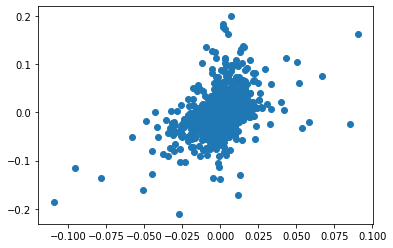

In [ ]:
plt.scatter(X, Y);

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

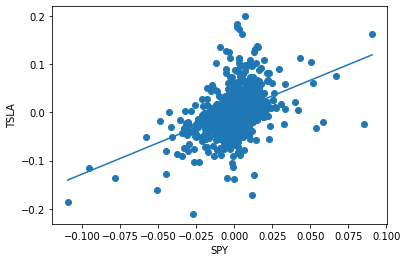

In [ ]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y);
plt.xlabel(stc_symbol2);
plt.ylabel(stc_symbol1);
plt.plot(X_predict, Y_predict);

In [ ]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00143804]), array([[1.29638065]]))

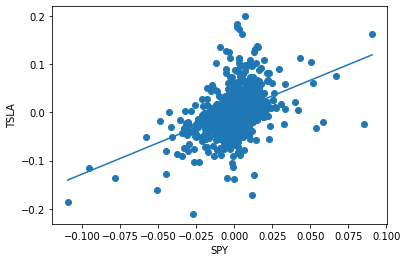

In [ ]:
# Manual calculation
Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel(stc_symbol2);
plt.ylabel(stc_symbol1);
plt.plot(X_predict, Y_predict);

In [ ]:
joined.std()

TSLA    0.033940
SPY     0.011188
dtype: float64

In [ ]:
joined[stc_symbol1].std() / joined[stc_symbol2].std()

3.0335209131991547

In [ ]:
close2_pct=close2.pct_change()

In [ ]:
close2_pct.head()

,TSLA,INTC,AMD,AAPL,MSFT,SPY,GOOG,FB,IBM
2014-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-28,0.024358,0.012248,-0.007673,-0.001116,0.023882,0.004930,0.002740,-0.015745,0.003266
2014-03-31,-0.018458,0.007572,0.033505,-0.000224,0.017122,0.008195,-0.005393,0.003833,0.010711
2014-04-01,0.040873,0.006818,0.014963,0.009148,0.010490,0.006631,0.018295,0.039509,0.010442
2014-04-02,0.061391,-0.003848,-0.002457,0.001662,-0.001690,0.003347,-0.000282,0.001597,-0.004884


In [ ]:
let's see if volatility clustering exists in the times series.   yes 2020 Q1. seems market dynamics has changed.

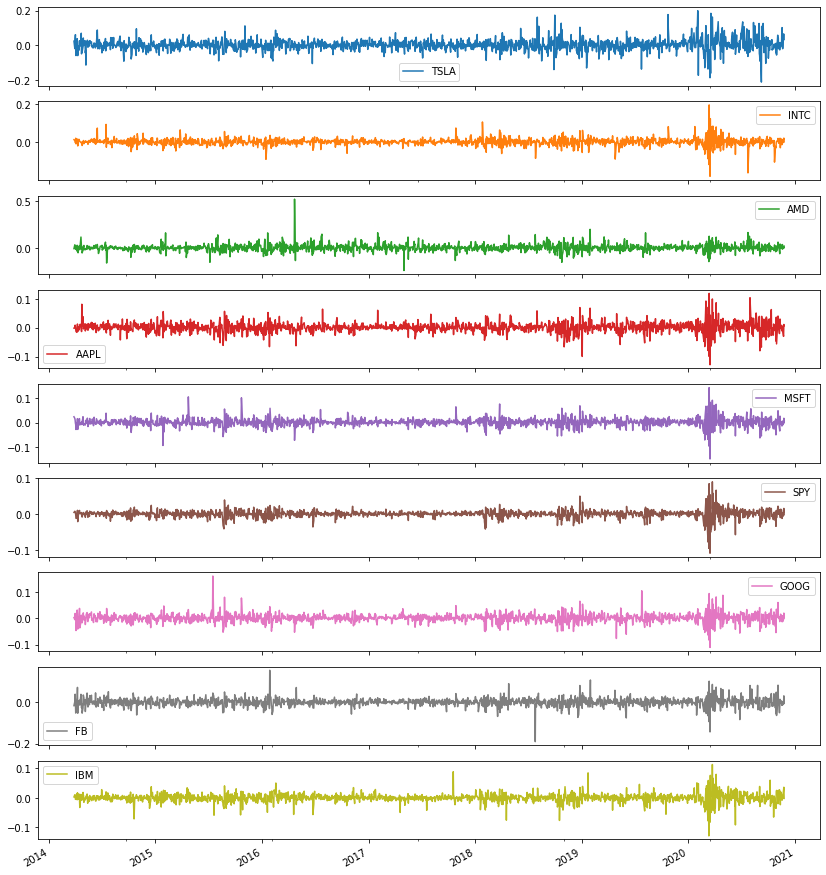

In [ ]:

close2_pct.plot(legend=True, figsize=(14, 17),subplots=True);